In [1]:
# inspired from
# https://towardsdatascience.com/linear-regression-with-bootstrapping-4924c05d2a9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns

In [79]:
# observed data
np.random.seed(123)
n = 11
_a = 0.5
_b = 0.1
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)*0.05
data_df = pd.DataFrame({'x': x, 'y': y})

In [80]:
ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()
# coefficients
print('Intercept, x-Slope : {}'.format(results.params))
y_pred = ols_model.fit().predict(data_df['x'])

Intercept, x-Slope : Intercept    0.089589
x            0.490150
dtype: float64


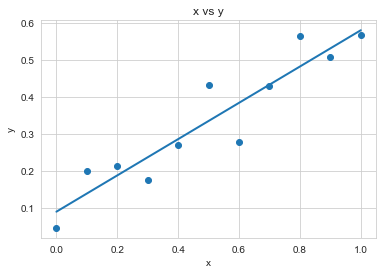

In [81]:
# plot results
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

In [82]:
# for tlim0 calculation
threshold = 1

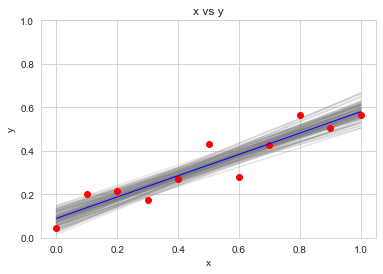

In [85]:
# resample with replacement each row
boot_slopes = []
boot_interc = []
boot_tlim = []
n_boots = 1000
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = data_df.sample(n=n, replace=True)
 #sample_df = data_df.sample(n=5, replace=False)
 # fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # append coefficients
 boot_interc.append(results_temp.params[0])
 boot_slopes.append(results_temp.params[1])
 tlim = (threshold - results_temp.params[0])/results_temp.params[1]
 boot_tlim.append(tlim)
 # plot a greyed out line
 #y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
 #plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)
 y_pred_temp = ols_model_temp.fit().predict(data_df['x'])
 ## Plot some sample regression lines
 if(_ < 100):
   plt.plot(data_df['x'], y_pred_temp, color='grey', alpha=0.2, zorder = 1)
plt.ylim(0.0,threshold)
# add data points
plt.scatter(x, y, zorder = 2, color = "red")
plt.plot(x, y_pred, linewidth=1, color = "blue")
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

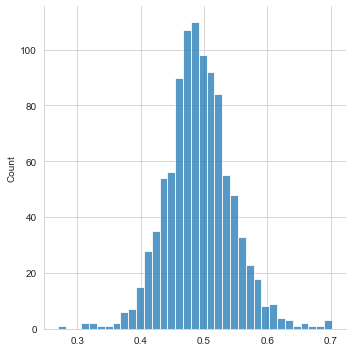

In [86]:
sns.displot(boot_slopes)
#plt.xlim(0,2)
plt.show()

In [87]:
# median slope
np.percentile(boot_slopes, 50)

0.4895490650671805

In [88]:
xstart,xend = np.percentile(boot_tlim, [0.5,99.5])

In [89]:
approx_median = np.percentile(boot_tlim, 50)

In [90]:
approx_median

1.8596714701100723

In [91]:
max(boot_tlim)

2.7572044103920637

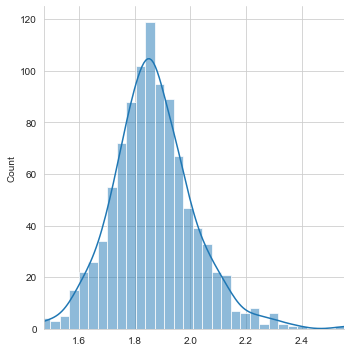

In [92]:
sns.displot(boot_tlim, kde=True)
plt.xlim(xstart,xend)
plt.show()

In [93]:
percentiles = [5, 25, 50, 75, 95]

5ntile=	1.6295257035241104
25ntile=	1.7770860631101137
50ntile=	1.8596714701100723
75ntile=	1.9499128946786801
95ntile=	2.1264176914242396


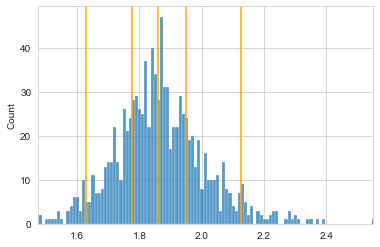

In [94]:
ax = sns.histplot(boot_tlim, binwidth=0.01)
for (p,q) in zip(percentiles, np.percentile(boot_tlim, percentiles)):
 plt.xlim(xstart,xend)
 plt.axvline(q, color='orange')
 print(str(p)+"ntile=\t"+str(q))
plt.show()

In [95]:
# wahrer Wert
(1.0 - _b)/_a

1.8